# **Getting Started**

# Document Layout Detection and Text Extraction
This notebook demonstrates an automated pipeline for document layout detection and text extraction. The project involves using advanced OCR techniques (PaddleOCR) and layout detection tools (Detectron2) to process scanned documents and extract structured information.

### Objectives:
1. Preprocess document images to enhance OCR accuracy.
2. Detect sections and subsections using layout detection.
3. Extract and structure text from each section.
4. Analyze the text.

### Use Case:
This workflow is useful for scenarios where structured information must be extracted from unstructured documents, such as:
- Legal documents
- Invoices
- Forms


# **Environment Setup**

In [ ]:
#@title check gpu
!nvidia-smi

Fri Nov 29 16:55:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#@title Install dependencies
# install dependencies: (use cu101 because colab has CUDA 10.1)
#!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 14.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-dybno348
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-dybno348
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_

In [ ]:
#@title Install Detectron2 Framework
# Detectron2: A modular framework by Facebook AI for object detection and segmentation tasks.

# Step 1: Clone and install Detectron2
%cd /content/
!git clone https://github.com/facebookresearch/detectron2  # Clone Detectron2 repository
%cd /content/detectron2
!pip install -r requirements.txt -q  # Install dependencies
!python setup.py install  # Install Detectron2
!pip install git+https://github.com/facebookresearch/fvcore.git -q  # Install fvcore (required by Detectron2)

# Step 2: Optional dependencies for Detectron2 (commented out for clarity)
"""
# Clone and install iopath
%cd /content/
!git clone https://github.com/facebookresearch/iopath  # Clone iopath repository
%cd /content/iopath
!python setup.py install  # Install iopath

# Clone and install portalocker
%cd /content/
!git clone https://github.com/WoLpH/portalocker  # Clone portalocker repository
%cd /content/portalocker
!python setup.py install  # Install portalocker
"""

/content
Cloning into 'detectron2'...
remote: Enumerating objects: 15819, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 15819 (delta 31), reused 47 (delta 17), pack-reused 15743 (from 1)
Receiving objects: 100% (15819/15819), 6.38 MiB | 7.96 MiB/s, done.
Resolving deltas: 100% (11525/11525), done.
/content/detectron2
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        *******************************

'\n%cd /content/\n!git clone https://github.com/facebookresearch/iopath\n%cd /content/iopath\n!python setup.py install\n\n%cd /content/\n!git clone https://github.com/WoLpH/portalocker\n%cd /content/portalocker\n!python setup.py install\n'

In [ ]:
#@title Install PaddleOCR
!pip install paddleocr paddlepaddle -q  # OCR library with advanced layout recognition and PaddlePaddle backend


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.7/544.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 86.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=818a9e1110e2bd514b37d93550740cebffc80b4d3158259d9df67ae172a3eb82
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a9349

In [ ]:
!pip install pdfplumber -q  # Extract text, images, and metadata from PDFs
!apt-get install -y poppler-utils > /dev/null 2>&1  # Required for converting PDFs to images
!pip install pdf2image -q  # Convert PDF pages to images
!pip install pytesseract -q  # Python wrapper for Tesseract OCR
!apt-get install tesseract-ocr -y > /dev/null 2>&1  # OCR engine for text recognition
!pip install transformers -q  # Hugging Face library for NLP models
!pip install layoutparser -q  # Framework for document layout analysis
!pip install 'layoutparser[detectron2]' -q  # Detectron2 support for layout detection
!pip install iopath -q  # Efficient file I/O for large datasets
!pip install antlr4-python3-runtime==4.9.3 -q  # Dependency for layoutparser and parsing tools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 20.9 MB/s eta 0:00:00


# **1. Preprocessing the Scanned Document**
**Goal:** Enhance the quality of the image for further processing, such as text extraction or layout analysis.

**Steps:**
1. Make sur the document is img based and not text based.
2. Convert it from pdf to png after making sure.
3. Convert the image to grayscale (already grayscale).
4. Apply noise reduction to clean up the text and remove artifacts.
5. Perform binarization (convert to black and white) to highlight the text.
6. Deskew the image if any slight rotation exists (this document appears well-aligned, so we might skip this step).

### **Determine PDF Type**

In [ ]:
import pdfplumber

# Open the PDF file
pdf_path = '/content/page.pdf'

# Use pdfplumber to open and process the PDF
with pdfplumber.open(pdf_path) as pdf:
    text = ""  # Initialize an empty string to store extracted text
    for page in pdf.pages:
        text += page.extract_text()  # Extract text from each page and append it

# Check if text is extracted to determine the type of PDF
if text.strip():
    print("This is a text-based PDF.")  # Text-based PDF identified
else:
    print("This is an image-based PDF.")  # Image-based PDF identified


This is an image-based PDF.


### **Convert pdf to png**

In [ ]:
from pdf2image import convert_from_path

# Path to the single-page PDF file
pdf_path = '/content/page.pdf'

# Convert the PDF to an image (high resolution)
image = convert_from_path(pdf_path, dpi=300)[0]

# Save the image
image_path = '/content/page_img.png'
image.save(image_path, 'PNG')

print(f"PDF converted to image and saved at {image_path}")


PDF converted to image and saved at /content/page_img.png


### **Image Preprocessing**

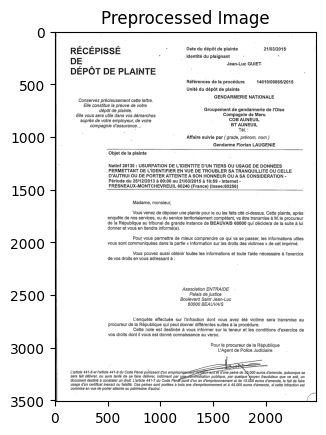

Preprocessed image saved at: /content/preprocessed_page_img.png


In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load the image
image_path = '/content/page_img.png'  # Path to the input image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

# Denoise the image
denoised = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur to reduce noise

# Binarization using adaptive thresholding
binarized = cv2.adaptiveThreshold(denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
# Convert the image to binary using adaptive thresholding

# Save and display the binarized image
preprocessed_path = '/content/preprocessed_page_img.png'  # Path to save the preprocessed image
cv2.imwrite(preprocessed_path, binarized)  # Save the processed image

plt.imshow(binarized, cmap='gray')  # Display the binarized image
plt.title("Preprocessed Image")
plt.show()

print(f"Preprocessed image saved at: {preprocessed_path}")  # Print the saved path


# **2. Layout Detection with layoutparser Models**

In this step, we focus on **layout detection**, a crucial preprocessing task that enhances the quality of OCR (Optical Character Recognition) results. By segmenting the document into well-defined sections, we aim to improve text detection accuracy and lay the groundwork for structured information extraction, such as Named Entity Recognition (NER).

#### **Reasoning and Assessment Goals**

The purpose of this step is twofold:

1. **Enhancing OCR Accuracy:**  
   By breaking the document into smaller, logically grouped subsections (e.g., title, date, and main content), OCR is more likely to detect all text and reduce the risk of missing critical information.

2. **Preparation for NER and Document Structuring:**  
   Through layout detection, we can identify and isolate specific terms and sections—such as the title, date, and other key elements—streamlining their use in subsequent NER or structured document analysis tasks.

#### **Challenges Encountered**

- **Fine-tuning Avoidance:**  
   Fine-tuning layout detection models for a single document type was not time-efficient given the limited scope of this assessment. Fine-tuning requires a labeled dataset, and collecting and annotating sufficient data was impractical for this task.

- **Adapting Pre-trained Models:**  
   Instead of fine-tuning, I opted to use pre-trained models with parameter adjustments to meet the specific needs of this document. This approach provided a balance between accuracy and efficiency, allowing us to leverage the strengths of existing models without the overhead of additional training.

#### **Approach**

By iterating between LayoutParser, OpenCV, LayoutLMv3, and Tesseract OCR, I refined the layout detection process to ensure robust detection of key subsections, which serves as the foundation for a reliable and structured OCR pipeline.

By the end of this step the document is segmented into smaller subsections **(Title, Advice, General info of the header, object of the plaint, main and footer with the signature)**.

### **Iteration 1: Initial Test with LayoutLMv3**
The goal of this test is to leverage the LayoutLMv3 model for token classification to detect and organize document regions into three primary sections: Header, Main Content, and Footer.

Tokens are relevant in the context of models like LayoutLMv3, where text understanding is tightly integrated with layout detection.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/275 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1161: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


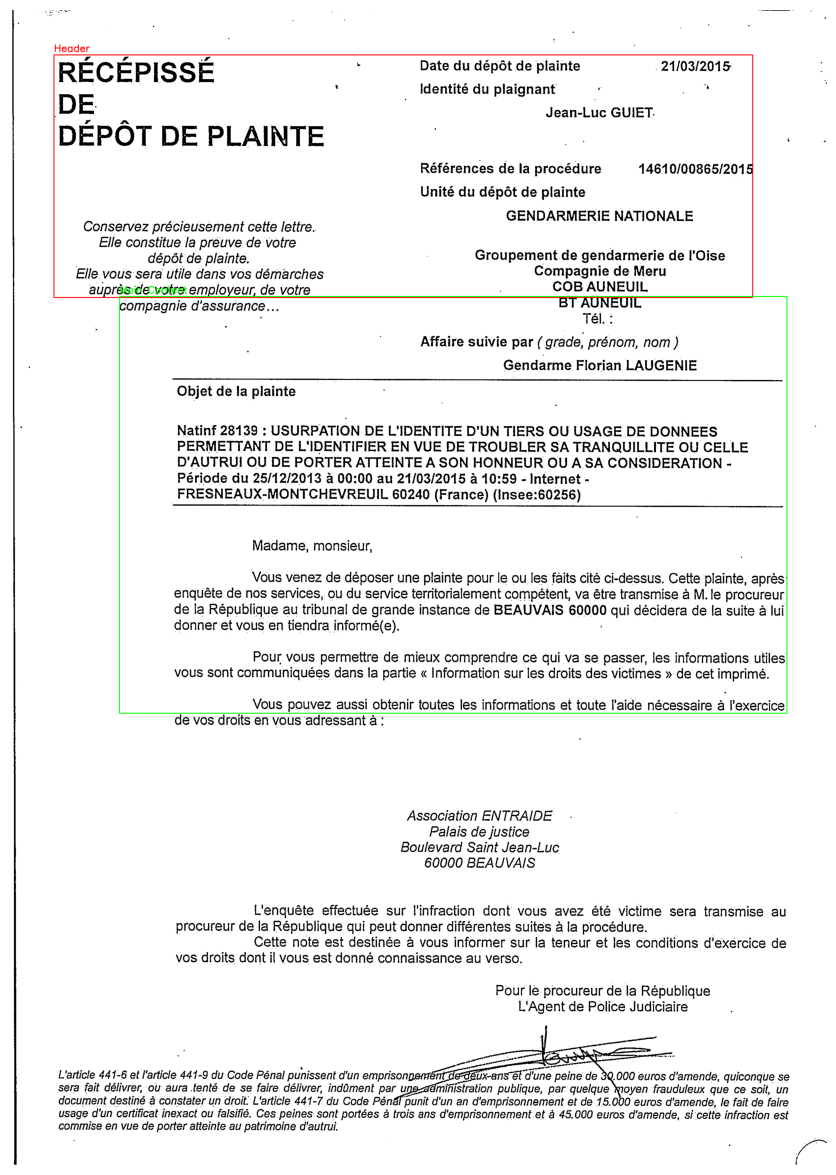

In [ ]:
from PIL import Image
from transformers import LayoutLMv3Processor, LayoutLMv3ForTokenClassification
import torch
import matplotlib.pyplot as plt
import cv2

# --- Load Image ---
# Load and convert the input image to RGB format (required by the processor).
image_path = "/content/preprocessed_page_img.png"
image = Image.open(image_path).convert("RGB")

# --- Load Model and Processor ---
# Load the LayoutLMv3 processor and token classification model pre-trained on the base dataset.
processor = LayoutLMv3Processor.from_pretrained("microsoft/layoutlmv3-base")
model = LayoutLMv3ForTokenClassification.from_pretrained("microsoft/layoutlmv3-base")

# --- Preprocessing and Input Preparation ---
# Convert the image to model inputs, including truncation and padding.
inputs = processor(image, return_tensors="pt", truncation=True, padding="max_length")
# Ensure bounding boxes are within valid range (clamped between 0 and 1000).
inputs["bbox"] = inputs["bbox"].clamp(0, 1000)

# --- Perform Inference ---
# Run the model and obtain logits for token classification.
outputs = model(**inputs)

# --- Extract Predictions ---
# Compute probabilities using softmax and extract the predicted class for each token.
logits = outputs.logits
probabilities = torch.nn.functional.softmax(logits, dim=-1)
predictions = torch.argmax(probabilities, dim=-1)

# --- Map Tokens and Bounding Boxes ---
# Retrieve tokens and bounding boxes from model outputs.
tokens = processor.tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
bboxes = inputs["bbox"][0].tolist()  # Extract bounding boxes.
image_width, image_height = image.size  # Original image dimensions.

# Scale bounding boxes to match the original image size.
def scale_bbox(bbox, width, height):
    x0 = int(bbox[0] * width / 1000)
    y0 = int(bbox[1] * height / 1000)
    x1 = int(bbox[2] * width / 1000)
    y1 = int(bbox[3] * height / 1000)
    return [x0, y0, x1, y1]

# Filter valid tokens and scale bounding boxes.
valid_predictions = [
    (token, scale_bbox(bbox, image_width, image_height), pred.item())
    for token, bbox, pred in zip(tokens, bboxes, predictions[0])
    if token not in ["[CLS]", "[SEP]", "[PAD]"] and bbox[0] < bbox[2] and bbox[1] < bbox[3]
]

# --- Group by Sections ---
# Separate tokens into Header, Main Content, and Footer based on Y-axis thresholds.
header_boxes, main_boxes, footer_boxes = [], [], []
header_threshold = int(image_height * 0.25)  # Top 25% of the image for Header.
footer_threshold = int(image_height * 0.75)  # Bottom 25% of the image for Footer.

for token, bbox, pred in valid_predictions:
    x0, y0, x1, y1 = bbox
    if y1 <= header_threshold:
        header_boxes.append(bbox)
    elif y0 >= footer_threshold:
        footer_boxes.append(bbox)
    else:
        main_boxes.append(bbox)

# --- Merge Bounding Boxes ---
# Combine multiple bounding boxes into a single rectangular region for each section.
def merge_boxes(boxes):
    if not boxes:
        return None
    x0 = min(box[0] for box in boxes)
    y0 = min(box[1] for box in boxes)
    x1 = max(box[2] for box in boxes)
    y1 = max(box[3] for box in boxes)
    return [x0, y0, x1, y1]

header_region = merge_boxes(header_boxes)
main_region = merge_boxes(main_boxes)
footer_region = merge_boxes(footer_boxes)

# --- Visualization ---
# Draw the merged bounding box regions on the original image.
image_np = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

def draw_region(image, region, label, color):
    if region:
        x0, y0, x1, y1 = region
        cv2.rectangle(image, (x0, y0), (x1, y1), color, 2)  # Draw bounding box.
        cv2.putText(image, label, (x0, y0 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)  # Add label.

draw_region(image_np, header_region, "Header", (255, 0, 0))  # Red for Header.
draw_region(image_np, main_region, "Main Content", (0, 255, 0))  # Green for Main Content.
draw_region(image_np, footer_region, "Footer", (0, 0, 255))  # Blue for Footer.

# Display the annotated image with bounding box regions.
plt.figure(figsize=(15, 15))
plt.imshow(image_np)
plt.axis("off")
plt.show()


### **2nd Iteration: Layout Detection with Detectron2**
In this iteration, we explore the use of Detectron2, a powerful object detection library, for layout detection. The aim is to leverage Detectron2's pre-trained models for better section and region segmentation, while avoiding extensive fine-tuning. Compared to the previous iteration, we utilize Detectron2's bounding box capabilities to define regions dynamically.

*   Detectron2 identifies bounding boxes based on visual content without tokenizing the text.

*   Unlike token-based models like LayoutLMv3, Detectron2 doesn't associate text directly with regions but provides a strong visual layout segmentation.




In [ ]:
import requests

# Define the URLs
weight_url = "https://www.dropbox.com/s/dgy9c10wykk4lq4/model_final.pth?dl=1"
config_url = "https://www.dropbox.com/s/f3b12qc4hc0yh4m/config.yml?dl=1"

# Define local paths
weight_path = "/content/model_final.pth"
config_path = "/content/config.yml"

# Download weights
with open(weight_path, "wb") as f:
    print("Downloading weights...")
    response = requests.get(weight_url)
    f.write(response.content)

# Download config
with open(config_path, "wb") as f:
    print("Downloading config...")
    response = requests.get(config_url)
    f.write(response.content)

print("Download complete.")


Download complete.


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:254: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cast(IO[bytes], file), map_location=

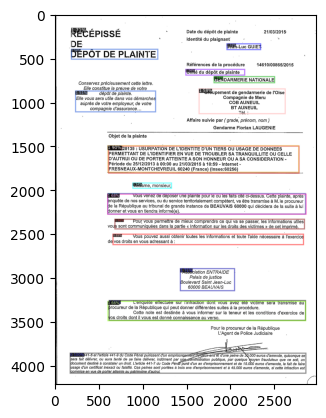

In [ ]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor

# Step 1: Initialize the Detectron2 configuration
cfg = get_cfg()  # Create a new configuration object
cfg.merge_from_file(config_path)  # Load pre-trained model configuration
cfg.MODEL.WEIGHTS = weight_path  # Load the model weights
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set the confidence threshold for predictions

# Step 2: Initialize the model predictor
predictor = DefaultPredictor(cfg)  # Create a predictor object using the loaded configuration

# Step 3: Perform inference on the input image
image_path = "/content/preprocessed_page_img.png"  # Path to the preprocessed image
import cv2
image = cv2.imread(image_path)  # Read the input image using OpenCV
outputs = predictor(image)  # Generate predictions (bounding boxes, scores, etc.)

# Step 4: Visualize the predictions
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Initialize the visualizer to display predictions
v = Visualizer(
    image[:, :, ::-1],  # Convert BGR image to RGB for visualization
    MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),  # Metadata for the dataset
    scale=1.2  # Adjust the visualization scale
)

# Draw the instance predictions on the image
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))  # Move predictions to CPU for visualization

# Display the results
plt.imshow(out.get_image()[:, :, ::-1])  # Convert back to RGB for matplotlib
plt.show()  # Show the image with bounding boxes


### **Same iteration & same logic**
This updated code refactors the original workflow into reusable functions for better organization and modularity.

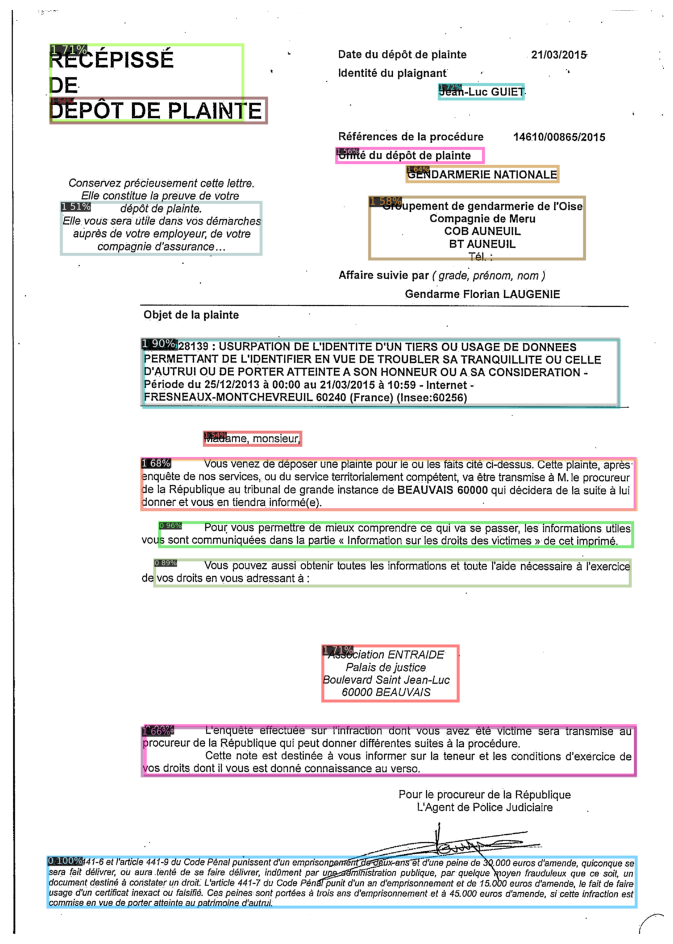

In [ ]:
# --- Model and Visualization Setup ---
from detectron2.utils.visualizer import Visualizer  # For visualization of model predictions

# --- Step 1: Initialize the Detectron2 Model ---
def setup_model(config_path, weights_path, confidence_threshold=0.5):
    """
    Configure and initialize the Detectron2 model.
    :param config_path: Path to the Detectron2 configuration file.
    :param weights_path: Path to the pre-trained model weights.
    :param confidence_threshold: Confidence threshold for predictions.
    :return: Configured model predictor.
    """
    cfg = get_cfg()  # Create a configuration object
    cfg.merge_from_file(config_path)  # Load the configuration file
    cfg.MODEL.WEIGHTS = weights_path  # Assign pre-trained weights
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = confidence_threshold  # Set confidence threshold
    cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available
    return DefaultPredictor(cfg)  # Return the initialized predictor

# --- Step 2: Perform Inference and Visualize ---
def perform_inference(predictor, image_path):
    """
    Perform model inference on an image and visualize the results.
    :param predictor: Configured model predictor.
    :param image_path: Path to the image for inference.
    :return: Model outputs.
    """
    image = cv2.imread(image_path)  # Read the image using OpenCV
    outputs = predictor(image)  # Perform inference

    # Visualize results with Detectron2 Visualizer
    visualizer = Visualizer(image[:, :, ::-1], scale=1.2)  # Prepare visualization object
    out = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))  # Annotate image

    # Display the annotated image
    plt.figure(figsize=(12, 12))
    plt.imshow(out.get_image()[:, :, ::-1])  # Convert back to RGB for display
    plt.axis("off")
    plt.show()
    return outputs  # Return outputs for further use if needed

# --- Step 3: Main Workflow ---
def main(image_path, config_path, weights_path):
    """
    Main function to set up the model, perform inference, and visualize the results.
    :param image_path: Path to the image for inference.
    :param config_path: Path to the Detectron2 configuration file.
    :param weights_path: Path to the pre-trained model weights.
    """
    # Initialize the model predictor
    predictor = setup_model(config_path, weights_path)

    # Perform inference and visualize results
    perform_inference(predictor, image_path)

# --- Run the Workflow ---
image_path = "/content/preprocessed_page_img.png"  # Path to the input image
weights_path = "/content/model_final.pth"  # Path to the model weights
config_path = "/content/config.yml"  # Path to the configuration file

main(image_path, config_path, weights_path)  # Execute the workflow


### **Same iteration with working on enhancing the Bounding Box**

### **What's new ?**
- **Combining Overlapping Boxes:**
  - Added the function `combine_boxes` to merge overlapping or nearby bounding boxes using an IoU (Intersection over Union) threshold. This consolidates overlapping regions into a single bounding box.

- **Adjusting Box Proximity:**
  - Introduced the function `adjust_box_proximity` to group bounding boxes that are close to each other but not overlapping. This adjustment ensures spatially related boxes are combined for better layout structure.

### **Goal**
- These changes eliminate redundant bounding boxes and ensure that logically related regions are grouped, improving layout detection accuracy.


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:254: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cast(IO[bytes], file), map_location=

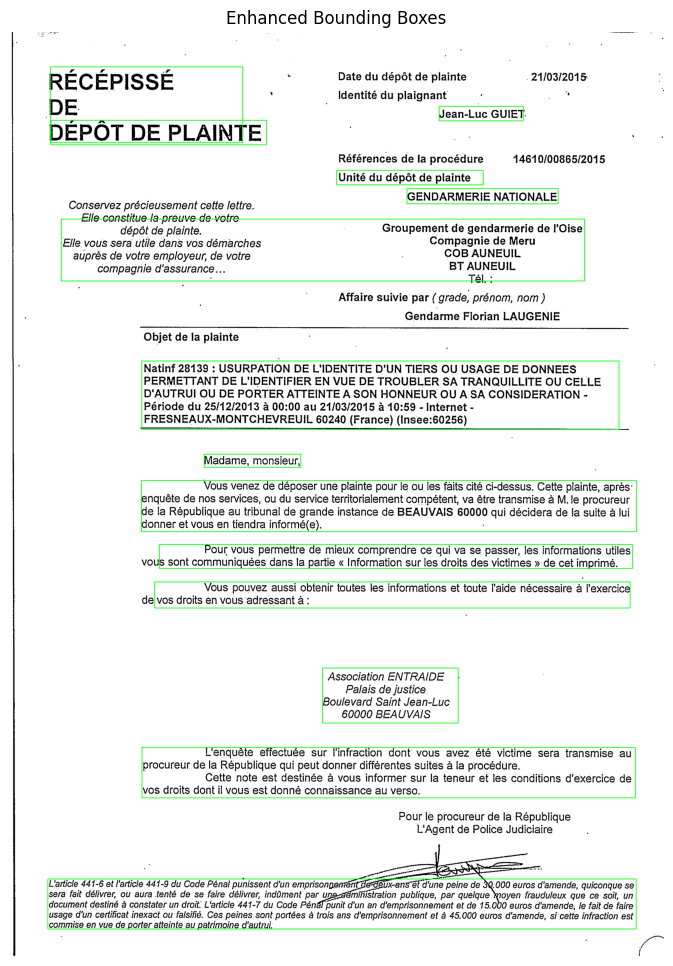

In [ ]:
def setup_model(config_path, weights_path, confidence_threshold=0.5):
    """
    Set up the Detectron2 model.
    - Initializes and configures the model using a configuration file and weights.
    - Allows for setting a confidence threshold for predictions.
    """
    cfg = get_cfg()  # Load default Detectron2 configuration
    cfg.merge_from_file(config_path)  # Load model-specific configuration file
    cfg.MODEL.WEIGHTS = weights_path  # Set the path to the trained model weights
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = confidence_threshold  # Set confidence threshold for predictions
    cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available, otherwise CPU
    return DefaultPredictor(cfg)  # Return a predictor object

def combine_boxes(boxes, iou_threshold=0.3):
    """
    Combine overlapping or nearby bounding boxes using IoU (Intersection over Union).
    - Filters boxes that have a significant overlap and merges them into a single bounding box.
    """
    def compute_iou(box1, box2):
        """Calculate the Intersection over Union (IoU) for two bounding boxes."""
        x1, y1, x2, y2 = box1
        x3, y3, x4, y4 = box2
        xi1, yi1 = max(x1, x3), max(y1, y3)
        xi2, yi2 = min(x2, x4), min(y2, y4)
        inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)  # Calculate intersection area
        box1_area = (x2 - x1) * (y2 - y1)
        box2_area = (x4 - x3) * (y4 - y3)
        union_area = box1_area + box2_area - inter_area  # Calculate union area
        return inter_area / union_area if union_area > 0 else 0  # Return IoU score

    combined_boxes = []
    while boxes:
        base_box = boxes.pop(0)  # Take the first box
        # Find boxes with IoU above the threshold to merge
        to_merge = [box for box in boxes if compute_iou(base_box, box) > iou_threshold]
        for box in to_merge:
            boxes.remove(box)  # Remove merged boxes from the list
        # Merge all overlapping boxes into one
        all_boxes = [base_box] + to_merge
        merged_box = [
            min(box[0] for box in all_boxes),
            min(box[1] for box in all_boxes),
            max(box[2] for box in all_boxes),
            max(box[3] for box in all_boxes),
        ]
        combined_boxes.append(merged_box)  # Append the merged box
    return combined_boxes

def adjust_box_proximity(boxes, proximity_threshold=20):
    """
    Adjust boxes by merging those close to each other vertically.
    - Combines bounding boxes based on their proximity in Y-axis.
    """
    adjusted_boxes = []
    while boxes:
        base_box = boxes.pop(0)  # Take the first box
        # Find boxes close to the base box vertically
        close_boxes = [
            box for box in boxes
            if abs(base_box[1] - box[1]) < proximity_threshold and abs(base_box[3] - box[3]) < proximity_threshold
        ]
        for box in close_boxes:
            boxes.remove(box)  # Remove merged boxes from the list
        # Merge all nearby boxes into one
        all_boxes = [base_box] + close_boxes
        adjusted_box = [
            min(box[0] for box in all_boxes),
            min(box[1] for box in all_boxes),
            max(box[2] for box in all_boxes),
            max(box[3] for box in all_boxes),
        ]
        adjusted_boxes.append(adjusted_box)  # Append the adjusted box
    return adjusted_boxes

def visualize_boxes(image, boxes, color=(0, 255, 0)):
    """
    Draw bounding boxes on an image.
    - Takes a list of bounding boxes and draws them on the input image.
    """
    for box in boxes:
        x0, y0, x1, y1 = map(int, box)  # Convert box coordinates to integers
        cv2.rectangle(image, (x0, y0), (x1, y1), color, 2)  # Draw rectangle for each box
    return image  # Return the annotated image

def main(image_path, config_path, weights_path):
    """
    Main workflow for loading the image, performing inference, and visualizing bounding boxes.
    - Uses Detectron2 to detect objects and enhances the bounding boxes.
    """
    # Step 1: Load Image and Model
    image = cv2.imread(image_path)  # Load the image
    predictor = setup_model(config_path, weights_path)  # Initialize the model

    # Step 2: Perform Inference
    outputs = predictor(image)  # Get model predictions
    instances = outputs["instances"].to("cpu")  # Move predictions to CPU
    boxes = instances.pred_boxes.tensor.numpy()  # Extract bounding boxes

    # Step 3: Adjust and Combine Boxes
    combined_boxes = combine_boxes(boxes.tolist(), iou_threshold=0.3)  # Merge overlapping boxes
    proximity_adjusted_boxes = adjust_box_proximity(combined_boxes, proximity_threshold=50)  # Adjust boxes based on proximity

    # Step 4: Visualize Results
    visualized_image = visualize_boxes(image.copy(), proximity_adjusted_boxes, color=(0, 255, 0))  # Draw adjusted boxes
    plt.figure(figsize=(12, 12))
    plt.imshow(visualized_image[:, :, ::-1])  # Display the image in RGB format
    plt.axis("off")
    plt.title("Enhanced Bounding Boxes")
    plt.show()

# Run the Pipeline
image_path = "/content/preprocessed_page_img.png"  # Path to the preprocessed image
config_path = "/content/config.yml"  # Path to the configuration file
weights_path = "/content/model_final.pth"  # Path to the model weights

main(image_path, config_path, weights_path)


### **Enhancing Bounding Box Refinement**

**What Changed:**

1. **Bounding Box Expansion:**  
   - Added the `expand_boxes` function to slightly expand the bounding boxes based on a configurable ratio. This ensures that the bounding boxes encompass the relevant areas more accurately.
   - Expansion is calculated based on the width and height of each box, and optionally constrained to the image dimensions.

2. **Grouping Related Boxes:**  
   - Introduced `group_related_boxes` to group nearby or aligned boxes based on a proximity threshold. This helps in combining logically related areas of the document.

These enhancements focus on improving the quality of detected regions for better downstream processing, ensuring that no critical elements are missed during layout detection.


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:254: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cast(IO[bytes], file), map_location=

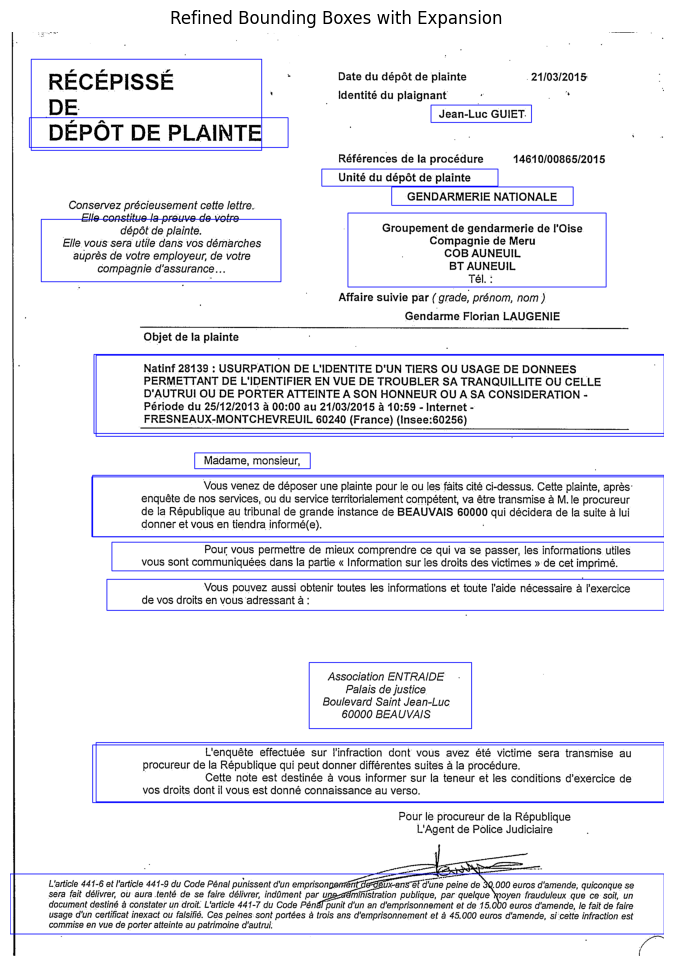

In [ ]:
def setup_model(config_path, weights_path, confidence_threshold=0.5):
    """
    Set up the Detectron2 model for inference.

    Parameters:
    - config_path: Path to the configuration file for Detectron2.
    - weights_path: Path to the pre-trained weights file.
    - confidence_threshold: Minimum confidence for predictions to be considered valid.

    Returns:
    - DefaultPredictor object configured for inference.
    """
    cfg = get_cfg()
    cfg.merge_from_file(config_path)  # Load configuration
    cfg.MODEL.WEIGHTS = weights_path  # Load model weights
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = confidence_threshold  # Set prediction confidence threshold
    cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available
    return DefaultPredictor(cfg)


def expand_boxes(boxes, expansion_ratio=0.05, image_width=None, image_height=None):
    """
    Expand bounding boxes by a specified ratio to include a margin around detected regions.

    Parameters:
    - boxes: List of bounding boxes [x0, y0, x1, y1].
    - expansion_ratio: Fraction by which to expand each side of the box.
    - image_width: Optional maximum width to constrain the expanded box.
    - image_height: Optional maximum height to constrain the expanded box.

    Returns:
    - List of expanded bounding boxes.
    """
    expanded_boxes = []
    for box in boxes:
        x0, y0, x1, y1 = box
        width = x1 - x0
        height = y1 - y0
        x0_new = max(0, x0 - expansion_ratio * width)  # Ensure box does not go out of bounds
        y0_new = max(0, y0 - expansion_ratio * height)
        x1_new = min(image_width, x1 + expansion_ratio * width) if image_width else x1 + expansion_ratio * width
        y1_new = min(image_height, y1 + expansion_ratio * height) if image_height else y1 + expansion_ratio * height
        expanded_boxes.append([x0_new, y0_new, x1_new, y1_new])
    return expanded_boxes


def group_related_boxes(boxes, texts, proximity_threshold=50):
    """
    Group bounding boxes that are close to each other based on proximity and alignment.

    Parameters:
    - boxes: List of bounding boxes [x0, y0, x1, y1].
    - texts: Associated text predictions (not used directly in grouping here but could be extended).
    - proximity_threshold: Maximum allowed distance to consider boxes as related.

    Returns:
    - List of grouped bounding boxes.
    """
    grouped_boxes = []
    used = set()
    for i, box1 in enumerate(boxes):
        if i in used:
            continue
        group = [box1]  # Start a new group with the current box
        for j, box2 in enumerate(boxes):
            if j == i or j in used:
                continue
            # Check if boxes are close enough vertically
            if abs(box1[3] - box2[1]) < proximity_threshold or abs(box1[1] - box2[3]) < proximity_threshold:
                group.append(box2)
                used.add(j)
        grouped_boxes.append(group)
        used.add(i)
    return grouped_boxes


def visualize_boxes(image, boxes, color=(0, 255, 0)):
    """
    Draw bounding boxes on an image for visualization.

    Parameters:
    - image: Input image (numpy array).
    - boxes: List of bounding boxes [x0, y0, x1, y1].
    - color: Color of the bounding box (default is green).

    Returns:
    - Image with bounding boxes drawn.
    """
    for box in boxes:
        x0, y0, x1, y1 = map(int, box)
        cv2.rectangle(image, (x0, y0), (x1, y1), color, 2)  # Draw rectangle on the image
    return image


def main(image_path, config_path, weights_path):
    """
    Main function to run the Detectron2 workflow with enhanced bounding box refinement.

    Steps:
    1. Load the input image.
    2. Perform inference using the Detectron2 model.
    3. Expand and adjust bounding boxes for better coverage.
    4. Visualize and display the refined bounding boxes.
    """
    # Step 1: Load Image and Model
    image = cv2.imread(image_path)
    height, width = image.shape[:2]  # Get image dimensions
    predictor = setup_model(config_path, weights_path)

    # Step 2: Perform Inference
    outputs = predictor(image)
    instances = outputs["instances"].to("cpu")
    boxes = instances.pred_boxes.tensor.numpy()  # Extract bounding boxes

    # Step 3: Expand and Adjust Boxes
    expanded_boxes = expand_boxes(boxes, expansion_ratio=0.1, image_width=width, image_height=height)

    # Step 4: Visualize Results
    visualized_image = visualize_boxes(image.copy(), expanded_boxes, color=(255, 0, 0))  # Draw expanded boxes
    plt.figure(figsize=(12, 12))
    plt.imshow(visualized_image[:, :, ::-1])
    plt.axis("off")
    plt.title("Refined Bounding Boxes with Expansion")
    plt.show()


# Run the Enhanced Workflow
image_path = "/content/preprocessed_page_img.png"  # Path to the preprocessed image
config_path = "/content/config.yml"  # Path to the model configuration
weights_path = "/content/model_final.pth"  # Path to the pre-trained weights

main(image_path, config_path, weights_path)


### **Dividing Document into Horizontal Sections for Enhanced Layout Detection**
This iteration introduces a strategy to preprocess the document by splitting it into smaller, horizontal sections (e.g., Header, Main Content, Footer) using OpenCV. The goal is to reduce the complexity of the document passed to the layout detection model (Detectron2), potentially improving detection accuracy for each subsection.

After preprocessing, the full document is still passed to Detectron2 for initial testing and comparison.

/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:254: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cast(IO[bytes], file), map_location=

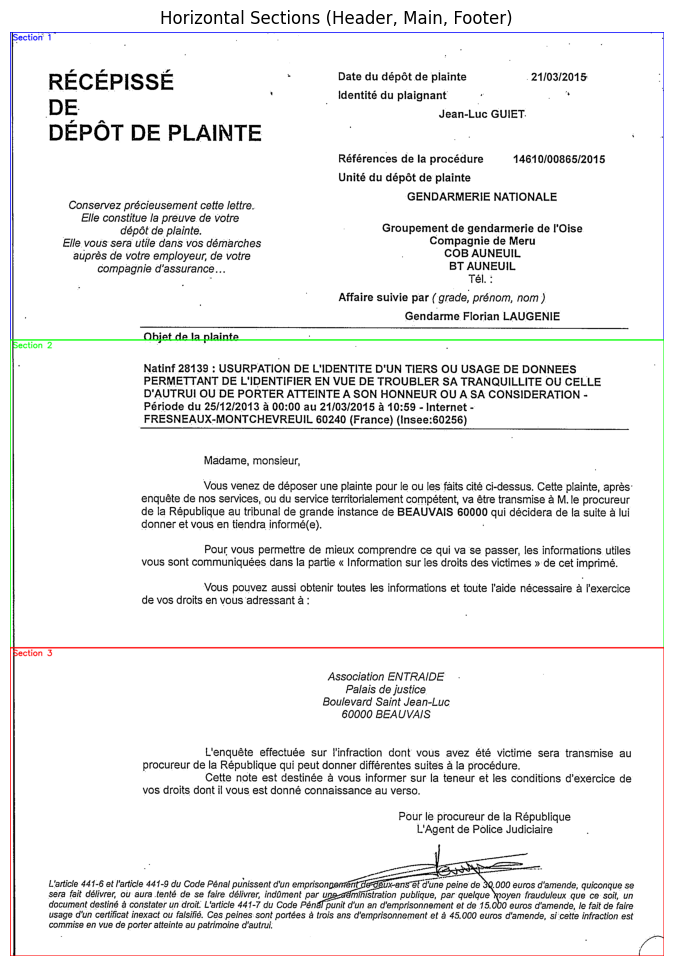

In [ ]:
import cv2

# --- Step 1: Preprocessing ---
def preprocess_image(image_path):
    """Load and preprocess the image."""
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found!")
    return image

# --- Step 2: Setup Detectron2 Model ---
def setup_model(config_path, weights_path, confidence_threshold=0.5):
    """Set up the Detectron2 model for inference."""
    cfg = get_cfg()
    cfg.merge_from_file(config_path)
    cfg.MODEL.WEIGHTS = weights_path
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = confidence_threshold  # Set confidence threshold
    cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    return DefaultPredictor(cfg)

# --- Step 3: Create Horizontal Sections ---
def create_horizontal_sections(image, num_sections=3):
    """
    Divide the image into horizontal sections.
    :param image: Input image (numpy array).
    :param num_sections: Number of horizontal sections (default: 3 for header, main, footer).
    :return: List of section bounding boxes.
    """
    height, width = image.shape[:2]
    section_height = height // num_sections
    sections = []

    for i in range(num_sections):
        y0 = i * section_height
        y1 = (i + 1) * section_height if i < num_sections - 1 else height
        sections.append((0, y0, width, y1))  # Full width of the image

    return sections

# --- Step 4: Visualize Horizontal Sections ---
def visualize_horizontal_sections(image, sections):
    """Visualize horizontal sections on the image."""
    section_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Colors for sections

    for idx, (x0, y0, x1, y1) in enumerate(sections):
        color = section_colors[idx % len(section_colors)]  # Cycle through colors
        cv2.rectangle(image, (x0, y0), (x1, y1), color, 3)
        cv2.putText(
            image,
            f"Section {idx + 1}",
            (x0 + 10, y0 + 30),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            color,
            2,
            cv2.LINE_AA,
        )

    return image

# --- Step 5: Main Workflow ---
def main(image_path, config_path, weights_path):
    # Step 1: Preprocess Image
    image = preprocess_image(image_path)

    # Step 2: Setup Model
    predictor = setup_model(config_path, weights_path)

    # Step 3: Perform Inference
    outputs = predictor(image)
    boxes = outputs["instances"].pred_boxes.tensor.cpu().numpy()  # Get detected boxes
    scores = outputs["instances"].scores.cpu().numpy()  # Confidence scores

    # Step 4: Create Horizontal Sections
    sections = create_horizontal_sections(image, num_sections=3)  # 3 sections (header, main, footer)

    # Step 5: Visualize Horizontal Sections
    visualized_image = visualize_horizontal_sections(image.copy(), sections)

    # Display Results
    plt.figure(figsize=(12, 12))
    plt.imshow(visualized_image[:, :, ::-1])
    plt.title("Horizontal Sections (Header, Main, Footer)")
    plt.axis("off")
    plt.show()

    return sections

# --- Run the Workflow ---
image_path = "/content/preprocessed_page_img.png"  # Path to your image
config_path = "/content/config.yml"  # Path to your config file
weights_path = "/content/model_final.pth"  # Path to your weights file

sections = main(image_path, config_path, weights_path)


### **Dynamic Thresholds for Section Division**

The sections (Header, Main Content, Footer) are now defined using a list of normalized thresholds (thresholds), making the division more flexible.

This change ensures dynamic adaptability to different document structures.


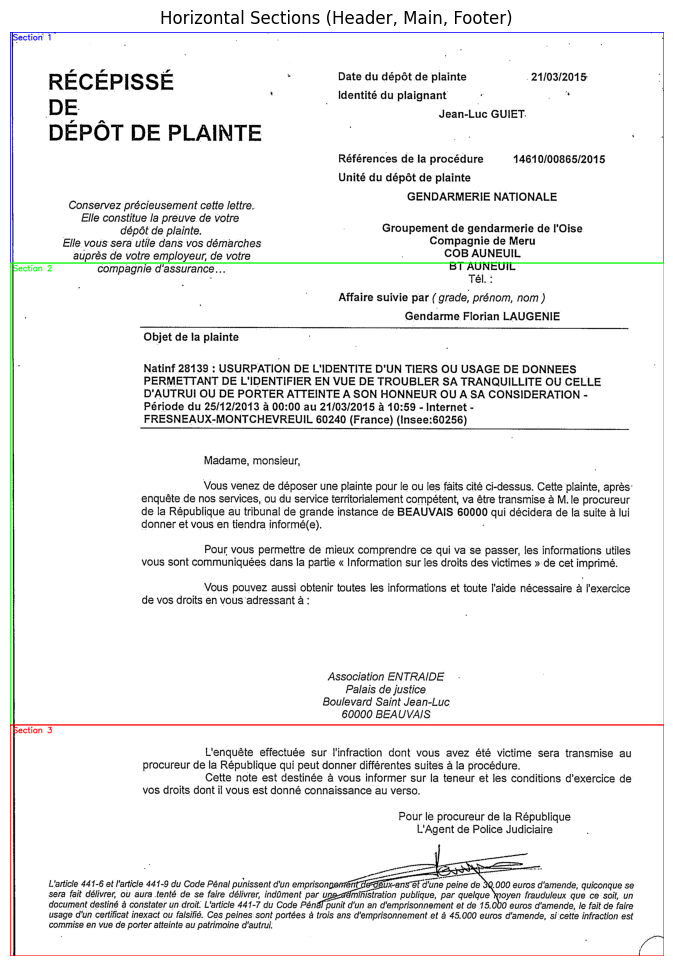

In [ ]:
# --- Step 1: Define Horizontal Sections ---
def define_horizontal_sections(image, thresholds):
    """
    Define horizontal sections (Header, Main Content, Footer).
    :param image: Input image (numpy array).
    :param thresholds: List of y-coordinate thresholds (normalized).
    :return: List of section bounding boxes [(x0, y0, x1, y1)].
    """
    height, width = image.shape[:2]
    sections = []
    for i in range(len(thresholds) - 1):
        y0 = int(thresholds[i] * height)
        y1 = int(thresholds[i + 1] * height)
        sections.append((0, y0, width, y1))  # Full width for each section
    return sections

# --- Step 2: Draw Horizontal Sections ---
def draw_horizontal_sections(image, sections, line_thickness=3):
    """Draw the defined horizontal sections on the image."""
    section_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Colors for Header, Main, Footer
    labeled_image = image.copy()
    for idx, (x0, y0, x1, y1) in enumerate(sections):
        color = section_colors[idx % len(section_colors)]  # Cycle through colors
        cv2.rectangle(labeled_image, (x0, y0), (x1, y1), color, line_thickness)
        cv2.putText(
            labeled_image,
            f"Section {idx + 1}",
            (10, y0 + 30),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            color,
            2,
            cv2.LINE_AA,
        )
    return labeled_image

# --- Main Workflow ---
def main(image_path, thresholds):
    # Step 1: Read Image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found!")

    # Step 2: Define Horizontal Sections
    sections = define_horizontal_sections(image, thresholds)

    # Step 3: Draw Horizontal Sections
    visualized_image = draw_horizontal_sections(image, sections)

    # Display Results
    plt.figure(figsize=(12, 12))
    plt.imshow(visualized_image[:, :, ::-1])  # Convert BGR to RGB for display
    plt.title("Horizontal Sections (Header, Main, Footer)")
    plt.axis("off")
    plt.show()

# --- Run ---
image_path = "/content/preprocessed_page_img.png"  # Path to your image
thresholds = [0, 0.25, 0.75, 1.0]  # Adjust these values to fit the document layout
main(image_path, thresholds)


### **Adjustable X and Y Margins**
Unlike previous iterations that only adjusted the vertical (Y-axis) thresholds for sections, this version introduces configurable X and Y margins for precise horizontal and vertical boundaries.

This approach is suitable for documents with **non-uniform margins or asymmetric layouts**, ensuring better alignment with the content structure.

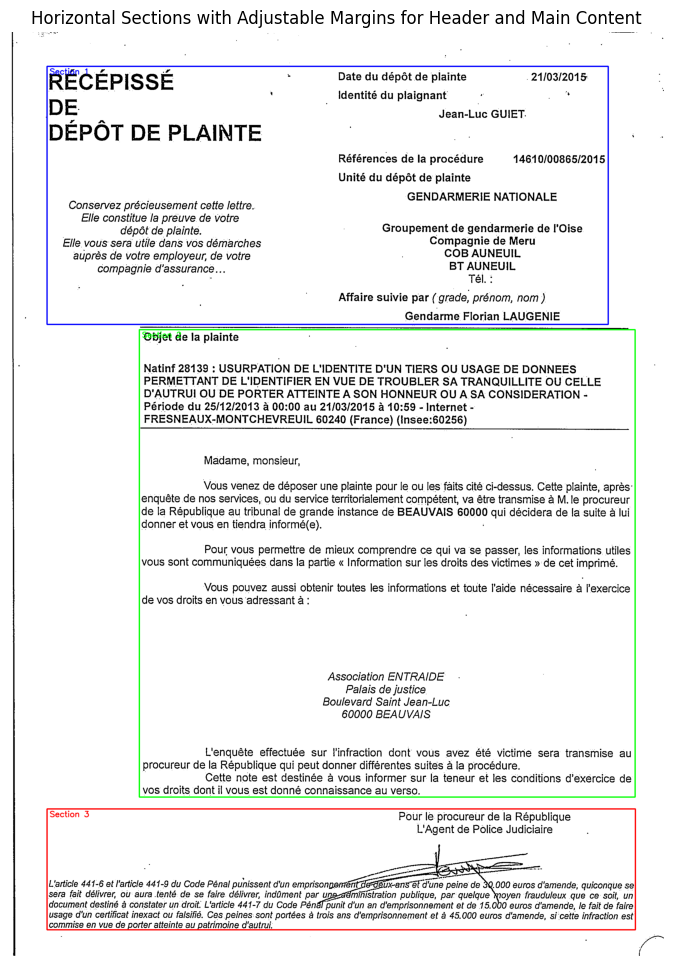

In [ ]:
import cv2
import matplotlib.pyplot as plt

# --- Step 1: Define Sections with Adjustable X and Y Margins ---
def define_sections_with_adjustable_margins(image, margins):
    """
    Define sections (Header, Main Content, Footer) with adjustable x and y margins.
    :param image: Input image (numpy array).
    :param margins: List of tuples defining (x_start, x_end, y_start, y_end) for each section.
    :return: List of section bounding boxes [(x0, y0, x1, y1)].
    """
    sections = []
    for x_start, x_end, y_start, y_end in margins:
        sections.append((x_start, y_start, x_end, y_end))
    return sections

# --- Step 2: Draw Sections with Adjustable Margins ---
def draw_sections(image, sections, line_thickness=3):
    """
    Draw the defined sections on the image.
    :param image: Input image (numpy array).
    :param sections: List of section bounding boxes [(x0, y0, x1, y1)].
    :param line_thickness: Thickness of the lines.
    :return: Image with sections drawn.
    """
    section_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Colors for Header, Main, Footer
    labeled_image = image.copy()
    for idx, (x0, y0, x1, y1) in enumerate(sections):
        color = section_colors[idx % len(section_colors)]  # Cycle through colors
        cv2.rectangle(labeled_image, (x0, y0), (x1, y1), color, line_thickness)
        cv2.putText(
            labeled_image,
            f"Section {idx + 1}",
            (x0 + 10, y0 + 30),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            color,
            2,
            cv2.LINE_AA,
        )
    return labeled_image

# --- Main Workflow ---
def main(image_path):
    # Step 1: Read Image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found!")

    # Step 2: Define Margins for Each Section
    height, width = image.shape[:2]
    margins = [
        (140, width - 212, 130, 1110),       # Header: Special x margins (200px padding)
        (490, width - 110, 1130, 2905),   # Main Content: Special x margins (150px padding)
        (140, width - 109, 2950, height-100)  # Footer: Standard x margins
    ]

    # Step 3: Define Sections with Adjustable Margins
    sections = define_sections_with_adjustable_margins(image, margins)

    # Step 4: Draw Sections
    visualized_image = draw_sections(image, sections)

    # Display Results
    plt.figure(figsize=(12, 12))
    plt.imshow(visualized_image[:, :, ::-1])  # Convert BGR to RGB for display
    plt.title("Horizontal Sections with Adjustable Margins for Header and Main Content")
    plt.axis("off")
    plt.show()

# --- Run ---
image_path = "/content/preprocessed_page_img.png"  # Path to your image
main(image_path)


## **Modified Workflow to Process Each Section**
1. Crop Sections First: Use the defined Header, Main, and Footer regions from your previous sectioning logic.
2. Run Detectron2 on each section individually to detect sub-sections like labels and values.
3. Enhance Refinement by expanding and merging boxes per section.
4. Visualize Results for each section separately.

/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:254: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cast(IO[bytes], file), map_location=

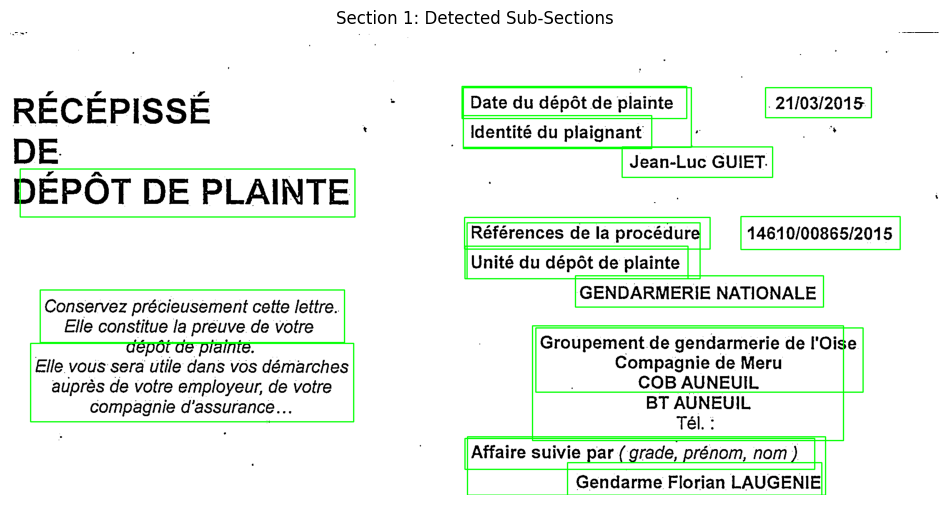

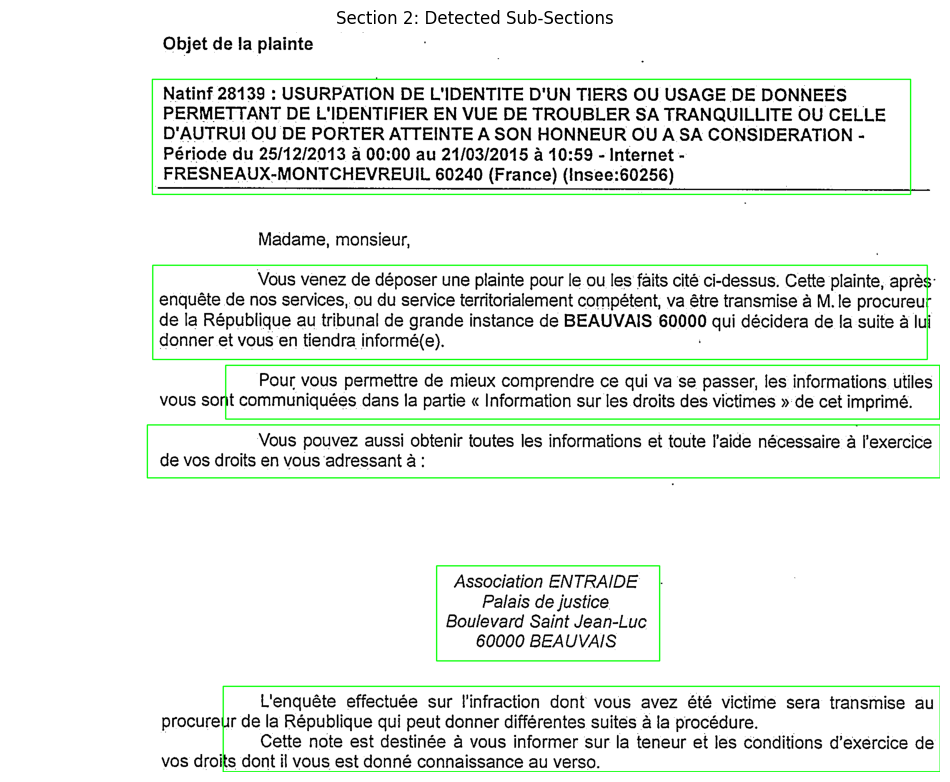

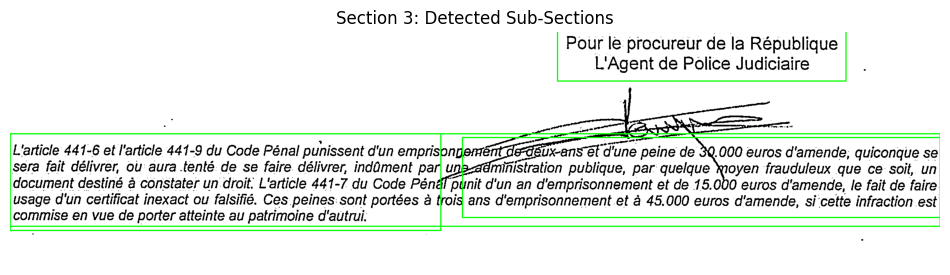

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
import os

# --- Step 1: Preprocessing ---
def preprocess_image(image_path):
    """Load the input image."""
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found!")
    return image

# --- Step 2: Initialize Detectron2 Model ---
def setup_model(config_path, weights_path, confidence_threshold=0.6):
    """Set up the Detectron2 model."""
    cfg = get_cfg()
    cfg.merge_from_file(config_path)
    cfg.MODEL.WEIGHTS = weights_path
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = confidence_threshold
    cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    return DefaultPredictor(cfg)

# --- Step 3: Define Horizontal Sections ---
def define_sections(image, x_margins, y_margins):
    """Define Header, Main, and Footer sections based on margins."""
    sections = []
    for y_start, y_end in y_margins:
        sections.append((x_margins[0], y_start, x_margins[1], y_end))
    return sections

# --- Step 4: Crop Sections ---
def crop_section(image, section_box):
    """Crop a section of the image."""
    x0, y0, x1, y1 = section_box
    return image[y0:y1, x0:x1]

# --- Step 5: Perform Inference ---
def perform_inference(predictor, image, expand_margin=15):
    """Run Detectron2 inference and refine bounding boxes."""
    outputs = predictor(image)
    instances = outputs["instances"].to("cpu")
    boxes = instances.pred_boxes.tensor.numpy()
    scores = instances.scores.numpy()
    classes = instances.pred_classes.numpy()

    # Expand boxes slightly
    expanded_boxes = expand_boxes(boxes, margin=expand_margin, image_shape=image.shape)

    return expanded_boxes, classes, scores

# --- Step 6: Expand Boxes ---
def expand_boxes(boxes, margin=10, image_shape=None):
    """Expand bounding boxes slightly."""
    expanded_boxes = []
    for box in boxes:
        x0, y0, x1, y1 = box
        x0 = max(x0 - margin, 0)
        y0 = max(y0 - margin, 0)
        x1 = min(x1 + margin, image_shape[1] if image_shape else x1 + margin)
        y1 = min(y1 + margin, image_shape[0] if image_shape else y1 + margin)
        expanded_boxes.append([x0, y0, x1, y1])
    return expanded_boxes

# --- Step 7: Visualize Results ---
def visualize_boxes(image, boxes, title):
    """Visualize bounding boxes on the image."""
    visualized_image = image.copy()
    for box in boxes:
        x0, y0, x1, y1 = [int(coord) for coord in box]
        cv2.rectangle(visualized_image, (x0, y0), (x1, y1), (0, 255, 0), 2)
    plt.figure(figsize=(12, 12))
    plt.imshow(cv2.cvtColor(visualized_image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# --- Main Workflow ---
def main(image_path, config_path, weights_path):
    # Step 1: Load the image
    image = preprocess_image(image_path)

    # Step 2: Define static margins for sections
    x_margins = (140, image.shape[1] - 109)  # Adjust as per your layout
    y_margins = [
        (0, 1110),  # Header
        (1130, 2905),  # Main Content
        (2950, image.shape[0])  # Footer
    ]
    sections = define_sections(image, x_margins, y_margins)

    # Step 3: Initialize the model
    predictor = setup_model(config_path, weights_path)

    # Step 4: Process each section
    for idx, section_box in enumerate(sections):
        section_image = crop_section(image, section_box)
        boxes, classes, scores = perform_inference(predictor, section_image)

        # Visualize detected sub-sections within the section
        visualize_boxes(section_image, boxes, title=f"Section {idx + 1}: Detected Sub-Sections")

# --- Run ---
image_path = "/content/preprocessed_page_img.png"
config_path = "/content/config.yml"
weights_path = "/content/model_final.pth"

main(image_path, config_path, weights_path)


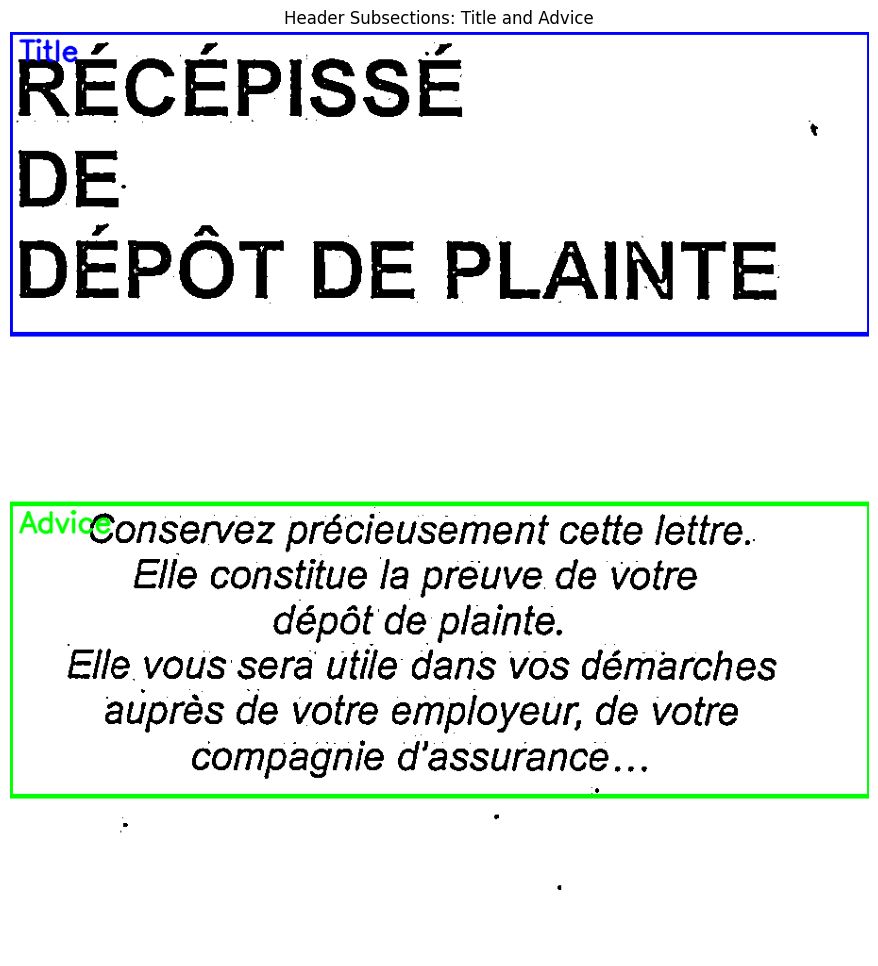

In [ ]:
import os

# --- Step 1: Define Header Subsections ---
def define_header_subsections(image, title_y_end):
    """
    Define the Title and Advice subsections in the header.
    :param image: Input header image (numpy array).
    :param title_y_end: Y-coordinate to separate the Title from Advice.
    :return: Bounding boxes for Title and Advice [(x0, y0, x1, y1)].
    """
    height, width = image.shape[:2]
    subsections = [
        (0, 0, width, title_y_end),  # Title
        (0, title_y_end + 180, width, height - 170)  # Advice
    ]
    return subsections

# --- Step 2: Draw Subsections ---
def draw_header_subsections(image, subsections, line_thickness=3):
    """
    Draw Title and Advice subsections on the header image.
    :param image: Input image (numpy array).
    :param subsections: List of subsection bounding boxes [(x0, y0, x1, y1)].
    :param line_thickness: Thickness of the lines.
    :return: Image with subsections drawn.
    """
    section_colors = [(255, 0, 0), (0, 255, 0)]  # Colors for Title and Advice
    labeled_image = image.copy()
    section_names = ["Title", "Advice"]

    for idx, (x0, y0, x1, y1) in enumerate(subsections):
        color = section_colors[idx % len(section_colors)]
        cv2.rectangle(labeled_image, (x0, y0), (x1, y1), color, line_thickness)
        cv2.putText(
            labeled_image,
            section_names[idx],
            (x0 + 10, y0 + 30),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            color,
            2,
            cv2.LINE_AA,
        )
    return labeled_image

# --- Step 3: Crop and Save Subsections ---
def crop_and_save_subsections(image, subsections, output_dir, section_names):
    """
    Crop and save the Title and Advice subsections.
    :param image: Input header image (numpy array).
    :param subsections: Bounding boxes for Title and Advice [(x0, y0, x1, y1)].
    :param output_dir: Directory to save cropped subsections.
    :param section_names: Names for the subsections (e.g., Title, Advice).
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for idx, (x0, y0, x1, y1) in enumerate(subsections):
        cropped = image[y0:y1, x0:x1]
        output_path = os.path.join(output_dir, f"{section_names[idx]}.png")
        cv2.imwrite(output_path, cropped)

# --- Main Workflow ---
def main(image_path, output_dir, title_y_end):
    # Step 1: Read Header Image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found!")

    # Step 2: Define Header Subsections
    subsections = define_header_subsections(image, title_y_end)

    # Step 3: Draw Subsections
    visualized_image = draw_header_subsections(image, subsections)

    # Display Results
    plt.figure(figsize=(12, 12))
    plt.imshow(cv2.cvtColor(visualized_image, cv2.COLOR_BGR2RGB))
    plt.title("Header Subsections: Title and Advice")
    plt.axis("off")
    plt.show()

    # Step 4: Crop and Save Subsections
    crop_and_save_subsections(image, subsections, output_dir, ["Title", "Advice"])

# --- Run ---
image_path = "/content/cropped_sections/header/header_title&advice.png"  # Input header image
output_dir = "/content/cropped_sections"  # Output directory for cropped subsections
title_y_end = 320  # Y-coordinate to separate Title from Advice (adjust manually)

main(image_path, output_dir, title_y_end)


# **3. Transition to Part II Notebook**

The next steps will be conducted in Part II of the notebook. This decision was made to address concerns about RAM limitations and to maintain clarity and organization as multiple steps are still pending.

### **Recap of Part I**

In this notebook, we completed the following tasks:
- **Image Preprocessing**: Enhanced the document image for better layout recognition.
- **Layout Recognition**: Utilized Detectron2 to identify and divide the document into subsections.
- **Prepared the road for some Entity Detection**: Reduced complexity by detecting specific regions such as the title and advice.

### **Next Steps**

In Part II, we will use the output generated here to perform region-specific OCR detection using **PaddleOCR**, an efficient and reliable OCR model.
